## Pre-processing Data

In [1]:
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")

   Resolving package versions...
  No Changes to `C:\Users\david\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\david\.julia\environments\v1.10\Manifest.toml`
Precompiling project...
  ✓ UnPack
  ✓ IterTools
  ✓ Parameters
  ✗ PyCall
  ✓ StatsBase
  ✗ ScikitLearn
  ✓ Plots
  ✓ Plots → UnitfulExt
  ✓ Plots → IJuliaExt
  7 dependencies successfully precompiled in 51 seconds. 182 already precompiled.
  2 dependencies errored.
  For a report of the errors see `julia> err`. To retry use `pkg> precompile`
   Resolving package versions...
  No Changes to `C:\Users\david\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\david\.julia\environments\v1.10\Manifest.toml`


In [2]:
using DataFrames, CSV

In [3]:
train_df = CSV.read("Train.csv", DataFrame)

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1?
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [4]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,446.0,1,446.0,891,0,Int64
2,Survived,0.383838,0,0.0,1,0,Int64
3,Pclass,2.30864,1,3.0,3,0,Int64
4,Name,,"Abbing, Mr. Anthony",,"van Melkebeke, Mr. Philemon",0,String
5,Sex,,female,,male,0,String7
6,Age,29.6991,0.42,28.0,80.0,177,"Union{Missing, Float64}"
7,SibSp,0.523008,0,0.0,8,0,Int64
8,Parch,0.381594,0,0.0,6,0,Int64
9,Ticket,,110152,,WE/P 5735,0,String31


In [5]:
train_df = dropmissing(train_df, "Embarked")

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,Int64,Int64,Int64,String,String7,Float64?,Int64,Int64,String31,Float64,String15?,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,missing,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,missing,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,missing,S
6,6,0,3,"Moran, Mr. James",male,missing,0,0,330877,8.4583,missing,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,missing,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,missing,S


In [6]:
train_df.Age = replace(train_df.Age, missing=>28)

889-element Vector{Float64}:
 22.0
 38.0
 26.0
 35.0
 35.0
 28.0
 54.0
  2.0
 27.0
 14.0
  4.0
 58.0
 20.0
  ⋮
 56.0
 25.0
 33.0
 22.0
 28.0
 25.0
 39.0
 27.0
 19.0
 28.0
 26.0
 32.0

In [7]:
train_df = select(train_df, Not("Cabin"))

Row,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,Int64,String,String7,Float64,Int64,Int64,String31,Float64,String1
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,S
6,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S


In [8]:
train_df = select(train_df, Not(["Name", "PassengerId"]))

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
,Int64,Int64,String7,Float64,Int64,Int64,String31,Float64,String1
1,0,3,male,22.0,1,0,A/5 21171,7.25,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.925,S
4,1,1,female,35.0,1,0,113803,53.1,S
5,0,3,male,35.0,0,0,373450,8.05,S
6,0,3,male,28.0,0,0,330877,8.4583,Q
7,0,1,male,54.0,0,0,17463,51.8625,S
8,0,3,male,2.0,3,1,349909,21.075,S
9,1,3,female,27.0,0,2,347742,11.1333,S


In [9]:
combine(groupby(train_df, "Embarked"), nrow=>"count")

Row,Embarked,count
,String1,Int64
1,S,644
2,C,168
3,Q,77


In [10]:
train_df.Embarked = Int64.(replace(train_df.Embarked, "S" => 1, "C" => 2, "Q" => 3))

889-element Vector{Int64}:
 1
 2
 1
 1
 1
 3
 1
 1
 1
 2
 1
 1
 1
 ⋮
 2
 1
 1
 1
 1
 1
 3
 1
 1
 1
 2
 3

In [11]:
combine(groupby(train_df, "Sex"), nrow=>"count")

Row,Sex,count
,String7,Int64
1,male,577
2,female,312


In [12]:
train_df.Sex = Int64.(replace(train_df.Sex, "male"=>0, "female"=>1 ))

889-element Vector{Int64}:
 0
 1
 1
 1
 0
 0
 0
 0
 1
 1
 1
 1
 0
 ⋮
 1
 1
 0
 1
 0
 0
 1
 0
 1
 1
 0
 0

In [13]:
combine(groupby(train_df, "Ticket"),nrow=>"count")

Row,Ticket,count
,String31,Int64
1,A/5 21171,1
2,PC 17599,1
3,STON/O2. 3101282,1
4,113803,2
5,373450,1
6,330877,1
7,17463,1
8,349909,4
9,347742,3


In [14]:
train_df = select(train_df, Not("Ticket"))

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Int64
1,0,3,0,22.0,1,0,7.25,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.925,1
4,1,1,1,35.0,1,0,53.1,1
5,0,3,0,35.0,0,0,8.05,1
6,0,3,0,28.0,0,0,8.4583,3
7,0,1,0,54.0,0,0,51.8625,1
8,0,3,0,2.0,3,1,21.075,1
9,1,3,1,27.0,0,2,11.1333,1


In [15]:
describe(train_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Survived,0.382452,0,0.0,1,0,Int64
2,Pclass,2.31159,1,3.0,3,0,Int64
3,Sex,0.350956,0,0.0,1,0,Int64
4,Age,29.3152,0.42,28.0,80.0,0,Float64
5,SibSp,0.524184,0,0.0,8,0,Int64
6,Parch,0.382452,0,0.0,6,0,Int64
7,Fare,32.0967,0.0,14.4542,512.329,0,Float64
8,Embarked,1.3622,1,1.0,3,0,Int64


## Visualizing Data

In [16]:
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\david\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\david\.julia\environments\v1.10\Manifest.toml`


In [17]:
using Plots

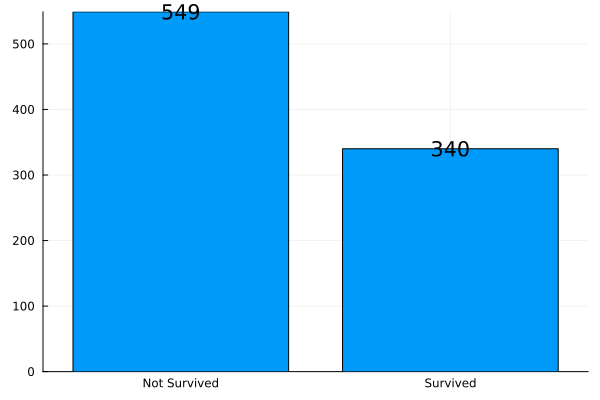

In [18]:
# Group data by the column "Survived"
survived = combine(groupby(train_df, "Survived"), nrow=> "Count")
labels = ["Not Survived", "Survived"]
bar(labels, survived.Count, legend=false, text=text=survived.Count)

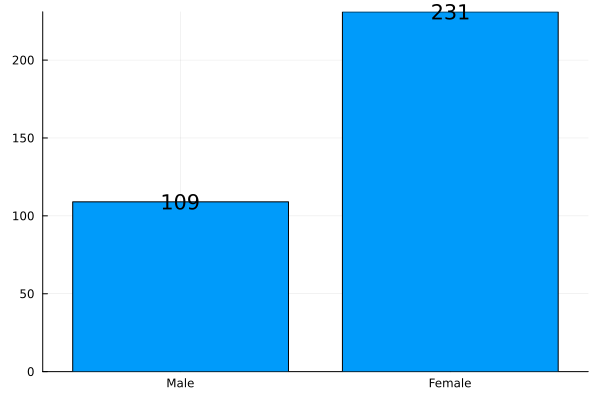

In [19]:
# Group dataset by Sex column and show only rows where they survived
survived_sex = combine(groupby(train_df[train_df.Survived .== 1,:],"Sex"), nrow=>"Count")
labels = ["Male","Female"]
bar(labels, survived_sex.Count, legend=false, text=text=survived_sex.Count)

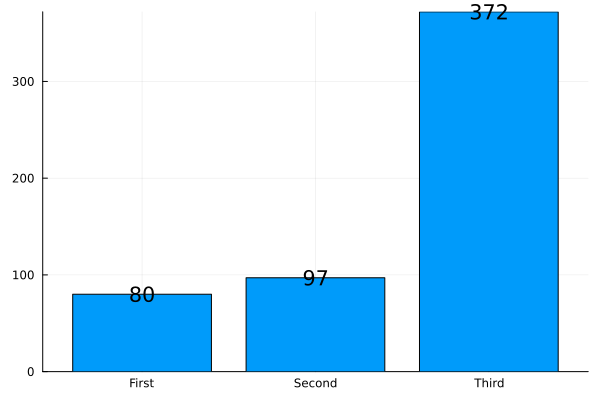

In [20]:
# Group data by PClass column and show only rows where they did not survived
death_class = combine(groupby(train_df[train_df.Survived .== 0,:], "Pclass"), nrow=>"Count")
labels = ["First","Second", "Third"]
bar(labels, death_class.Count, legend=false, text=text=death_class.Count)

In [21]:
train_df

Row,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
,Int64,Int64,Int64,Float64,Int64,Int64,Float64,Int64
1,0,3,0,22.0,1,0,7.25,1
2,1,1,1,38.0,1,0,71.2833,2
3,1,3,1,26.0,0,0,7.925,1
4,1,1,1,35.0,1,0,53.1,1
5,0,3,0,35.0,0,0,8.05,1
6,0,3,0,28.0,0,0,8.4583,3
7,0,1,0,54.0,0,0,51.8625,1
8,0,3,0,2.0,3,1,21.075,1
9,1,3,1,27.0,0,2,11.1333,1


## Training machine learning model

In [22]:
Pkg.add("DecisionTree")
Pkg.add("ScikitLearn")

   Resolving package versions...
  No Changes to `C:\Users\david\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\david\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\david\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\david\.julia\environments\v1.10\Manifest.toml`


In [24]:
Pkg.build("PyCall")

    Building Conda ─→ `C:\Users\david\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\b19db3927f0db4151cb86d073689f2428e524576\build.log`
    Building PyCall → `C:\Users\david\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\9816a3826b0ebf49ab4926e2b18842ad8b5c8f04\build.log`


In [25]:
using DecisionTree, ScikitLearn.CrossValidation

Precompiling ScikitLearn
  ✓ PyCall
  ✓ ScikitLearn
  2 dependencies successfully precompiled in 9 seconds. 42 already precompiled.


In [28]:
y = train_df[:,"Survived"]
X = Matrix(train_df[:, Not(["Survived"])])

model = RandomForestClassifier(n_trees=100)

fit!(model, X, y)

accuracy = minimum(cross_val_score(model, X, y, cv=5))

0.7752808988764045

In [42]:
test_df = CSV.read("test.csv",DataFrame)
describe(test_df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,Type
1,PassengerId,1100.5,892,1100.5,1309,0,Int64
2,Pclass,2.26555,1,3.0,3,0,Int64
3,Name,,"Abbott, Master. Eugene Joseph",,"van Billiard, Master. Walter John",0,String
4,Sex,,female,,male,0,String7
5,Age,30.2726,0.17,27.0,76.0,86,"Union{Missing, Float64}"
6,SibSp,0.447368,0,0.0,8,0,Int64
7,Parch,0.392344,0,0.0,9,0,Int64
8,Ticket,,110469,,W.E.P. 5734,0,String31
9,Fare,35.6272,0.0,14.4542,512.329,1,"Union{Missing, Float64}"


In [44]:
PassengerId = test_df[:,"PassengerId"]

418-element Vector{Int64}:
  892
  893
  894
  895
  896
  897
  898
  899
  900
  901
  902
  903
  904
    ⋮
 1298
 1299
 1300
 1301
 1302
 1303
 1304
 1305
 1306
 1307
 1308
 1309

In [45]:
test_df = select(test_df, Not(["PassengerId", "Name", "Ticket", "Cabin"]))
test_df.Age = replace(test_df.Age, missing=>28)
test_df.Embarked = replace(test_df.Embarked, "S"=>1, "C"=>2, "Q"=>3)
test_df.Embarked = convert.(Int64, test_df.Embarked)
test_df.Sex = replace(test_df.Sex, "male"=>0, "female"=>1)
test_df.Sex = convert.(Int64, test_df.Sex)

test_df.Fare = replace(test_df.Fare, missing=>14.4542)

418-element Vector{Float64}:
   7.8292
   7.0
   9.6875
   8.6625
  12.2875
   9.225
   7.6292
  29.0
   7.2292
  24.15
   7.8958
  26.0
  82.2667
   ⋮
  10.5
 211.5
   7.7208
  13.775
   7.75
  90.0
   7.775
   8.05
 108.9
   7.25
   8.05
  22.3583

In [47]:
Survived = predict(model, Matrix(test_df))

418-element Vector{Int64}:
 0
 0
 0
 1
 1
 0
 0
 0
 1
 0
 0
 0
 1
 ⋮
 0
 0
 1
 1
 1
 1
 0
 0
 1
 0
 0
 1

## Prepare submission

In [48]:
submit_df = DataFrame(PassengerId=PassengerId, Survived=Survived)
CSV.write("submission.csv", submit_df)

"submission.csv"

## Deploy model to production

In [51]:
Pkg.add("JLD2")

   Resolving package versions...
   Installed JLD2 ─── v0.4.53
   Installed FileIO ─ v1.16.3
    Updating `C:\Users\david\.julia\environments\v1.10\Project.toml`
  [033835bb] + JLD2 v0.4.53
    Updating `C:\Users\david\.julia\environments\v1.10\Manifest.toml`
  [5789e2e9] + FileIO v1.16.3
  [033835bb] + JLD2 v0.4.53
Precompiling project...
  ✓ FileIO
  ✓ Plots → FileIOExt
  ✓ JLD2
  3 dependencies successfully precompiled in 47 seconds. 191 already precompiled.


In [52]:
using JLD2

In [53]:
save_object("titanic.jld2", model)